In [243]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation as inter
from skimage.filters import gaussian
from scipy.signal import convolve2d
from contour_sort import *
from fix_image_orientation import *
from crop_image import *
from paper_extraction import *
from commonfunctions import *
from skimage.feature import canny
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin

In [244]:
img = cv2.imread('../../Results/Results/2/4/1.jpg')

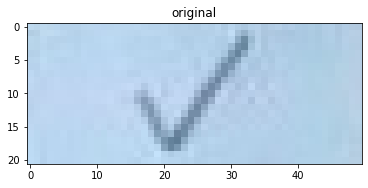

In [245]:
show_images([img], ['original'])

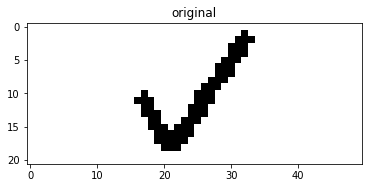

0.04081632653061224
0.04081632653061224
0.10204081632653061
0.04081632653061224
0.0
0.0
0.02040816326530612
0.02040816326530612
0.0
0.06818181818181818
0.04081632653061224
0.041666666666666664
0.0
0.04081632653061224
0.043478260869565216
0.0
0.041666666666666664


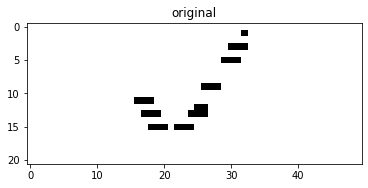

In [267]:
def detact_correct (img):
   
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#     img = convolve2d(~img,  kernel)
#     show_images([img], ['original'])
    blur = cv2.GaussianBlur(img , (0,0), sigmaX=100, sigmaY=100)
  
    img = cv2.divide(img, blur, scale=255)
    img=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 51, 15)
#     show_images([divide], ['original'])
#     (thresh, img_bin) = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# #     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# #     morph = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
#     show_images([img_bin], ['original'])
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
# #     img = cv2.erode(~img, kernel, iterations=1)
#     img = cv2.dilate(~img, kernel, iterations=2)
#     img = cv2.erode(img, kernel, iterations=2)
#     skeleton = skeletonize(img)
    lines_ver = cv2.HoughLinesP(img,1,np.pi/180,40,minLineLength=5,maxLineGap=10)
#     print(len(lines_ver))
    show_images([img], ['original'])
    for line  in lines_ver:
        for x1, y1, x2, y2 in line:
            print(abs((y2-y1)/(x2-x1)))
            img=cv2.line(img,(x1,y1),(x2,y2),(255,255,255),1)
    show_images([img], ['original'])
detact_correct(img=img)

In [238]:
def detact_correct (img):

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kernel =np.ones([2, 2], dtype = int)
    img = cv2.dilate(~img, kernel, iterations=)
    img = cv2.erode(img, kernel, iterations=3)
    show_images([img], ['original'])
    img=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 51, 15)
  
    kernel =np.ones([2, 2], dtype = int)

    (thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  
    lines_ver = cv2.HoughLinesP(img_bin,1,np.pi/180,20,minLineLength=2,maxLineGap=20)
    print(len(lines_ver))
    show_images([img_bin], ['original'])
detact_correct(img=img)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3955756865.py, line 5)